**1 Decision Trees and Ensemble Learning**


> **1.1 Credit Risk Scoring Project**



In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

**1.2 Data cleaning and preparation**


*   Download the dataset
*   Re-encoding the categorical variable  
*   Doing the train/validation/test split





In [5]:
data = "https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv"

In [6]:
!wget $data

--2023-02-26 17:46:40--  https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv’

CreditScoring.csv   100%[===================>] 178.21K  --.-KB/s    in 0.03s   

2023-02-26 17:46:40 (6.07 MB/s) - ‘CreditScoring.csv’ saved [182489/182489]



In [7]:
df = pd.read_csv('CreditScoring.csv')

In [8]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [9]:
df.columns = df.columns.str.lower()

In [10]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [11]:
df.status = df.status.map({1 : "good" , 2:"bad" , 0:"unk"})

In [12]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [13]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,good,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,good,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,bad,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,good,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,good,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [14]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [15]:
for c in ['income' , 'assets' , 'debt']:
   df[c] = df[c].replace(to_replace =99999999 , value = np.nan )

In [16]:
df  = df[df.status != 'unk'].reset_index(drop = True)

In [17]:
X = df.drop("status" , axis = 1)

In [18]:
X.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


In [19]:
y = df.status
y

0       good
1       good
2        bad
3       good
4       good
        ... 
4449     bad
4450    good
4451     bad
4452    good
4453    good
Name: status, Length: 4454, dtype: object

In [20]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 11)
X_train , X_val , y_train , y_val = train_test_split(X_train , y_train , test_size = 0.25 , random_state = 11)

In [21]:
X_test.shape , X_val.shape , X_train.shape

((891, 13), (891, 13), (2672, 13))

**1.3 Decision Trees**

*   How a decision Tree looks like 
*   Training a decision Tree
*   Overfition
*   Controling the size of a tree







In [22]:
def assess_risk(client):
  if client['records'] == 'yes':
    if client['job'] == 'parttime':
      return 'default'
    else :
      return 'ok'
  else :
    if client['assest'] > 6000:
      return 'ok' 
    else:
      return 'default'      

In [23]:
x_i = X_train.iloc[10].to_dict()

In [24]:
assess_risk(x_i)

'ok'

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer

In [26]:
train_dict = X_train.fillna(0).to_dict(orient = 'records')
train_dict[:5]

[{'seniority': 10,
  'home': 'owner',
  'time': 36,
  'age': 36,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 75,
  'income': 0.0,
  'assets': 10000.0,
  'debt': 0.0,
  'amount': 1000,
  'price': 1400},
 {'seniority': 6,
  'home': 'parents',
  'time': 48,
  'age': 32,
  'marital': 'single',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 35,
  'income': 85.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1100,
  'price': 1330},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 40,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 75,
  'income': 121.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1320,
  'price': 1600},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 23,
  'marital': 'single',
  'records': 'no',
  'job': 'partime',
  'expenses': 35,
  'income': 72.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1078,
  'price': 1079},
 {'seniority': 5,
  'home': 'owner',
  'time': 36,
  'age': 46,
  'm

In [27]:
dv = DictVectorizer()

In [28]:
X_train = dv.fit_transform(train_dict)


In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)

DecisionTreeClassifier()

In [30]:
val_dict = X_val.fillna(0).to_dict(orient = 'records')
X_val = dv.transform(val_dict)

In [31]:
y_pred = dt.predict_proba(X_val)[: , 1]
y_pred[:5]

array([1., 1., 1., 1., 1.])

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val , y_pred)

0.6624446005182727

**here we will restrict our tree to prevent overfitting**

In [33]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
y_pred = dt.predict_proba(X_val)[: , 1]
roc_auc_score(y_val , y_pred)

0.7389079944782155

**here we are able to see how the tree work on the backend**

In [35]:
from sklearn.tree import export_text
print(export_text(dt , feature_names = dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: good
|   |   |--- income >  74.50
|   |   |   |--- class: good
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: bad
|   |   |--- assets >  8750.00
|   |   |   |--- class: good
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: good
|   |   |--- amount >  862.50
|   |   |   |--- class: bad
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: bad
|   |   |--- income >  103.50
|   |   |   |--- class: good



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
y_val

2404    good
908     good
2464    good
1663     bad
1518    good
        ... 
1968    good
4370    good
1324     bad
4080    good
2935    good
Name: status, Length: 891, dtype: object

**1.4 Decision Tree Learning parameter tuning**

*   selecting max_depth
*   selecting min_samples_leaf




In [37]:
 for d in [1 , 2 , 3 , 4 , 5 , 6 , 10 , 15 , 20 , None]:
      dt =  DecisionTreeClassifier(max_depth = d)
      dt.fit(X_train , y_train)
      y_pred  = dt.predict_proba(X_val)[: , 1]
      auc = roc_auc_score(y_val , y_pred)
      print(f"{d} ---> {auc}")

1 ---> 0.6058644740984718
2 ---> 0.6685264343319368
3 ---> 0.7389079944782155
4 ---> 0.7612827250490423
5 ---> 0.7669377103969388
6 ---> 0.7619487297474027
10 ---> 0.7029921774720883
15 ---> 0.6741814196798335
20 ---> 0.659925891840837
None ---> 0.6370637669225739


In [38]:
score = []
for d in [4 , 5 , 6 , 10 , 15 , 39 , None]:
  for s in [1 , 2, 5, 10 , 15 , 20 , 100 , 200, 500]:
    dt =  DecisionTreeClassifier(max_depth = d , min_samples_leaf=s)
    dt.fit(X_train , y_train)
    y_pred  = dt.predict_proba(X_val)[: , 1]
    auc = roc_auc_score(y_val , y_pred)
    score.append((d , s , auc))

In [39]:
columns = ["max_depth" , "min_samples_leaf" , "auc"]
df_scores = pd.DataFrame(score , columns = columns)
df_scores.sort_values(by = "auc" , ascending = False).head()
df_scores_pivot = df_scores.pivot(index = 'min_samples_leaf' , columns = ['max_depth'] , values=['auc'])

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

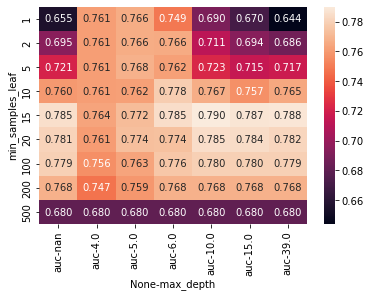

In [40]:
sns.heatmap(df_scores_pivot , annot = True , fmt = '.3f')

In [41]:
dt = DecisionTreeClassifier(max_depth = 6 , min_samples_leaf=15)
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

**1.5  Ensembles and random forest**

*   Board of experts
*   Ensembling models
*   Random forest - ensembleing decision trees
*   Tuning random forest


In [42]:
from sklearn.ensemble import RandomForestClassifier



In [43]:
score = []
for d in [5 , 10 , 15]:
    for n in range(10 , 201 , 10):
      rf = RandomForestClassifier(n_estimators=n , max_depth = d , random_state = 1)
      rf.fit(X_train , y_train)
      y_pred = rf.predict_proba(X_val)[: , 1]
      auc = roc_auc_score(y_val , y_pred)
      score.append((d , n , auc))

In [44]:
df_scores = pd.DataFrame(score , columns = ["max_depth" , "n_estimators" , 'auc'])

In [45]:
df_scores

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878
5,5,60,0.801167
6,5,70,0.802251
7,5,80,0.803244
8,5,90,0.803616
9,5,100,0.804452


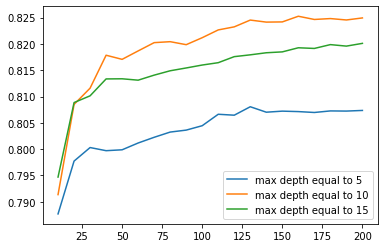

In [46]:
for d in [5 , 10 , 15]:
  subset = df_scores[df_scores.max_depth == d]
  plt.plot(subset.n_estimators , subset.auc , label = f'max depth equal to {d}' )
  plt.legend()


**now let's select our final model with this new values for the parameters**

In [47]:
min_samples_leaf = 3
max_depth = 10

In [48]:
rf = RandomForestClassifier(n_estimators = 200 , max_depth = max_depth , min_samples_leaf= min_samples_leaf , random_state = 1)
rf.fit(X_train , y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [49]:
y_pred = rf.predict_proba(X_val)[: , 1]
roc_auc_score(y_val , y_pred)

0.8246258264512848

**1.6 Gradient boosting and Xgboost**

*   Gradient boosting vs random forest
*   installing XGboost
*   Training the first model
*   Performance monitoring
*   Parsing xgboost's monitoring output




In [50]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:

y_train = (y_train == 'bad').astype('int').values

In [51]:

y_val = (y_val == 'bad').astype('int').values

In [52]:
y_val

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [53]:
import xgboost as xgb

In [56]:
features = dv.get_feature_names()
dvtrain = xgb.DMatrix(X_train , label = y_train , feature_names = features)
dval = xgb.DMatrix(X_val , label = y_val , feature_names = features)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [57]:
xgb_params = {'eta':0.3 , 'max_depth':6  ,  'min_child_weight':1 , 'objective':'binary:logistic' , 'nthread':8 , 'seed':1 , 'verbosity':1 ,}

model = xgb.train(xgb_params , dvtrain , num_boost_round = 10)

In [58]:
y_pred = model.predict(dval)
roc_auc_score(y_val , y_pred)

0.8152745150274878

In [59]:
watchlist = [(dvtrain , 'train') , (dval , 'val')]

In [146]:
%%capture output
xgb_params = {'eta':0.05 , 'max_depth':6,'eval_metric':'auc' , 'min_child_weight':1 , 'objective':'binary:logistic' , 'nthread':8 , 'seed':1 , 'verbosity':1 ,}

model = xgb.train(xgb_params , dvtrain , evals = watchlist ,verbose_eval = 5, num_boost_round = 200 )

In [77]:
def parse_xgb_output(output):
  results = []
  for line in output.stdout.strip().split("\n"):
      it_line, train_line, val_line = line.split("\t")
      it = int(it_line.strip('[]'))
      train = float (train_line.split(":")[1])
      val = float (val_line.split (":")[1])
      results.append( (it, train, val))
  columns = ["num_iter", "train_auc", "val_auc"]
  df_results = pd.DataFrame(results, columns = columns)
  return df_results

In [78]:
df_score = parse_xgb_output(output)

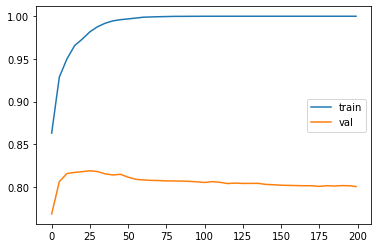

In [79]:
plt.plot(df_score.num_iter , df_score.train_auc , label = 'train')
plt.plot(df_score.num_iter , df_score.val_auc , label = 'val')
plt.legend()

**1.7 XGBoost parameter tuning**

*   eta
*   max_depth
*   min_child_weight




In [152]:
scores = {}

In [165]:
%%capture output
xgb_params = {'eta':0.1 , 'max_depth':6,'eval_metric':'auc' , 'min_child_weight':1 , 'objective':'binary:logistic' , 'nthread':8 , 'seed':1 , 'verbosity':1 ,}

model = xgb.train(xgb_params , dvtrain , evals = watchlist ,verbose_eval = 5, num_boost_round = 200 )

In [166]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)


In [169]:
scores

{'eta=0.05':     num_iter  train_auc   val_auc
 0          0   0.862996  0.768179
 1          5   0.878850  0.779213
 2         10   0.895767  0.799978
 3         15   0.907896  0.802412
 4         20   0.916153  0.803205
 5         25   0.922287  0.804930
 6         30   0.927503  0.806883
 7         35   0.931773  0.810413
 8         40   0.936325  0.810198
 9         45   0.941836  0.811306
 10        50   0.944919  0.811509
 11        55   0.948742  0.813694
 12        60   0.951015  0.812689
 13        65   0.953656  0.812750
 14        70   0.956094  0.812919
 15        75   0.958260  0.815256
 16        80   0.960791  0.816818
 17        85   0.962626  0.818063
 18        90   0.964725  0.819631
 19        95   0.966300  0.820545
 20       100   0.968269  0.820781
 21       105   0.969730  0.821804
 22       110   0.970918  0.822204
 23       115   0.972147  0.822573
 24       120   0.973522  0.822967
 25       125   0.974768  0.823015
 26       130   0.976000  0.822937
 27     

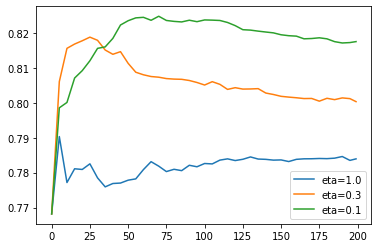

In [171]:
etas = ['eta=1.0' , 'eta=0.3' , 'eta=0.1']
for eta in etas:
  df_scores = scores[eta]
  plt.plot(df_scores.num_iter , df_scores.val_auc , label = eta)
  
plt.legend()  

In [173]:
scores = {}

In [180]:
%%capture output
xgb_params = {'eta':0.1 , 'max_depth':10,'eval_metric':'auc' , 'min_child_weight':1 , 'objective':'binary:logistic' , 'nthread':8 , 'seed':1 , 'verbosity':1 ,}

model = xgb.train(xgb_params , dvtrain , evals = watchlist ,verbose_eval = 5, num_boost_round = 200 )

In [181]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)


In [183]:
del scores['max_depth=10']

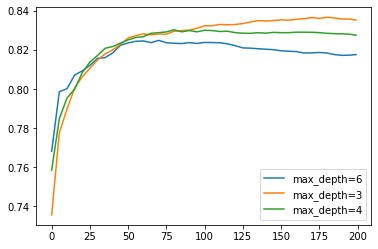

In [184]:
for max_depth , df_scores in scores.items():
  plt.plot(df_scores.num_iter , df_scores.val_auc , label = max_depth)
plt.legend() 

In [185]:
scores = {}

In [196]:
%%capture output
xgb_params = {'eta':0.1 , 'max_depth':3,'eval_metric':'auc' , 'min_child_weight':100 , 'objective':'binary:logistic' , 'nthread':8 , 'seed':1 , 'verbosity':1 ,}

model = xgb.train(xgb_params , dvtrain , evals = watchlist ,verbose_eval = 5, num_boost_round = 200 )

In [197]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)


In [200]:
del scores['min_child_weight=100']

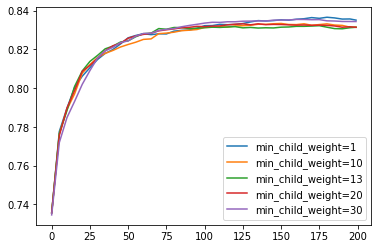

In [201]:
for min_child_weight , df_scores in scores.items():
  plt.plot(df_scores.num_iter , df_scores.val_auc , label = min_child_weight)
plt.legend() 

In [202]:
%%capture output
xgb_params = {'eta':0.1 , 'max_depth':3,'eval_metric':'auc' , 'min_child_weight':1 , 'objective':'binary:logistic' , 'nthread':8 , 'seed':1 , 'verbosity':1 ,}

model = xgb.train(xgb_params , dvtrain , evals = watchlist ,verbose_eval = 5, num_boost_round = 175 )

**1.8 Selecting the final model**

*   choosing between xgboost, random forest and decision tree
*   Training the final model
*   Saving the model




In [206]:
dt = DecisionTreeClassifier(max_depth = 6 , min_samples_leaf=15)
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [209]:
y_pred = dt.predict(X_val)
roc_auc_score(y_val , y_pred)

0.6992807149257707

In [205]:
rf = RandomForestClassifier(n_estimators = 200 , max_depth = 10 , min_samples_leaf= 3 , random_state = 1)
rf.fit(X_train , y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [210]:
y_pred = rf.predict(X_val)
roc_auc_score(y_val , y_pred)

0.6629955680414619

In [203]:
%%capture output
xgb_params = {'eta':0.1 , 'max_depth':3,'eval_metric':'auc' , 'min_child_weight':1 , 'objective':'binary:logistic' , 'nthread':8 , 'seed':1 , 'verbosity':1 ,}

model = xgb.train(xgb_params , dvtrain , evals = watchlist ,verbose_eval = 5, num_boost_round = 175 )

In [212]:
y_pred = model.predict(dval)
roc_auc_score(y_val , y_pred)

0.8360387251459157